 ##  0. Importing Packages

In [3]:
%run import_modules.py 
import warnings
import time
import pandas as pd
import numpy as np
import os 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50, 'display.max_rows', 200)


import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf

# Tensorflow warning off
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

#tf.logging.set_verbosity(tf.logging.ERROR)
# import logging
# logger = tf.get_logger()
# logger.setLevel(logging.ERROR)

#from tensorflow import set_random_seed         ##tf.random.set_seed(1)
import keras 
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot
from keras.callbacks import EarlyStopping

from scipy.stats.mstats import gmean

In [4]:
cd C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Data

C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Data


## 1. Reading Data

In [5]:
myseed = 56 #anchoring

#to_remove = ['휴면(이탈)여부','화장품품목구매여부', '디자이너품목구매여부', '시티웨어품목구매여부', #Target Features to remove
             #'구매상품종류1_cat', '내점일수_cat', '총구매액_cat','최대구매액_cat','내점당구매액_cat','행사상품구매총액_cat']

target_remove = ['내점당구매건수','최근3개월_구매금액', '최근3개월_구매건수', '최근6개월_구매금액', #Target Features to remove
                 '최근6개월_구매건수', '최근12개월_구매금액', '최근12개월_구매건수','구매상품종류1',
                 '구매상품종류2','내점일수','내점당구매액','휴면(이탈)여부','화장품품목구매건수', '디자이너품목구매건수',
                 '시티웨어품목구매건수', '수산품품목구매건수','가공식품품목구매건수','행사상품구매건수','농산물품목구매건수',
                 '축산가공품목구매건수','시티웨어품목구매여부']
raw_feature = pd.read_csv('Raw_feature_continuos+categorical_before_Encoding.csv',encoding='cp949', index_col=0) #F2
raw_feature_label = pd.read_csv('Raw_feature_labelencoding+categorical_before_Encoding.csv',encoding='cp949', index_col=0) #F1
raw_feature_label_c = pd.read_csv('Raw_feature_labelencoding+categorical_before_Encoding_cleansed.csv',encoding='cp949', index_col=0) #F1_Cleansed

y_train = pd.read_csv('y_train.csv').gender # y_train
IDtest = pd.read_csv('X_test.csv', encoding='cp949').cust_id.unique() #target ID for prediction

# Train, Test (F1)
train = raw_feature[:3500]
test = raw_feature[3500:]

#Feature Segregation
cat_features = list(raw_feature.select_dtypes(include=['object']).columns)
num_features = [c for c in raw_feature.columns.tolist() if c not in cat_features]

bool_features = raw_feature.select_dtypes(include=['bool'])
for col in bool_features:
    raw_feature[col] = raw_feature[col].astype(float)

if len(cat_features) > 0:
    raw_feature = pd.concat([raw_feature[num_features], pd.get_dummies(raw_feature[cat_features])], axis=1)

In [6]:
feature_continuous = raw_feature.iloc[:,:67]
to_PCA = raw_feature.iloc[:,67:]

In [8]:
to_PCA.shape

(5982, 111)

* ### Reduce Dimensionality using Autoencoder

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 111)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 111)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                7168      
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_86 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_87 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_89 (Dense)             (None, 8)                 72 

Epoch 61/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0251 - val_loss: 0.0254
Epoch 62/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0251 - val_loss: 0.0254
Epoch 63/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0251 - val_loss: 0.0253
Epoch 64/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0250 - val_loss: 0.0252
Epoch 65/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0249 - val_loss: 0.0252
Epoch 66/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0249 - val_loss: 0.0251
Epoch 67/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0248 - val_loss: 0.0251
Epoch 68/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0247 - val_loss: 0.0250
Epoch 69/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0247 - val_loss: 0.0249
Epoch 70/1000
4187/4187 [=====================

Epoch 138/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0220 - val_loss: 0.0225
Epoch 139/1000
4187/4187 [==============================] - 0s 17us/step - loss: 0.0220 - val_loss: 0.0225
Epoch 140/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0220 - val_loss: 0.0225
Epoch 141/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0220 - val_loss: 0.0224
Epoch 142/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0219 - val_loss: 0.0225
Epoch 143/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0219 - val_loss: 0.0225
Epoch 144/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0219 - val_loss: 0.0224
Epoch 145/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0218 - val_loss: 0.0224
Epoch 146/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0219 - val_loss: 0.0224
Epoch 147/1000
4187/4187 [===========

4187/4187 [==============================] - 0s 18us/step - loss: 0.0209 - val_loss: 0.0215
Epoch 215/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0210 - val_loss: 0.0215
Epoch 216/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0209 - val_loss: 0.0215
Epoch 217/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0209 - val_loss: 0.0215
Epoch 218/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0210 - val_loss: 0.0215
Epoch 219/1000
4187/4187 [==============================] - 0s 19us/step - loss: 0.0209 - val_loss: 0.0215
Epoch 220/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0209 - val_loss: 0.0215
Epoch 221/1000
4187/4187 [==============================] - 0s 17us/step - loss: 0.0209 - val_loss: 0.0215
Epoch 222/1000
4187/4187 [==============================] - 0s 18us/step - loss: 0.0208 - val_loss: 0.0214
Epoch 223/1000
4187/4187 [==========================

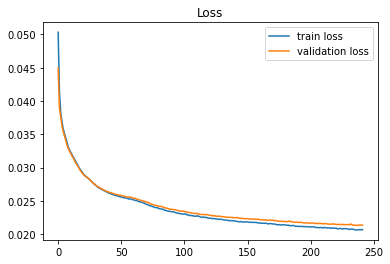

In [18]:
train_pca, test_pca = train_test_split(to_PCA, test_size=0.3, random_state=myseed)

# Define the number of features
max_features = to_PCA.shape[1]

# Define the encoder dimension
encoding_dim = 4

### Dropout rate
noise_level = 0.01

# Input Layer
input_dim = Input(shape = (max_features, ))

# Encoder Layers
noise = Dropout(noise_level)(input_dim)
encoded1 = Dense(64, activation = 'relu')(noise)
encoded2 = Dense(32, activation = 'relu')(encoded1)
encoded3 = Dense(16, activation = 'relu')(encoded2)
encoded4 = Dense(8, activation = 'relu')(encoded3)
encoded5 = Dense(encoding_dim, activation = 'relu')(encoded4)

# Decoder Layers
decoded1 = Dense(8, activation = 'relu')(encoded4)
decoded2 = Dense(16, activation = 'relu')(decoded1)
decoded3 = Dense(32, activation = 'relu')(decoded2)
decoded4 = Dense(64, activation = 'relu')(decoded3)
decoded5 = Dense(max_features, activation = 'linear')(decoded4)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded5)
autoencoder.summary()

# Compile the model
autoencoder.compile(optimizer = 'adam', loss = 'mse')

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

# Train the model
history = autoencoder.fit(train_pca,train_pca, epochs=1000, batch_size=128, 
                          shuffle=True, validation_data=(test_pca,test_pca), callbacks = callbacks, verbose=1)

#print(f'DAE learning curve {i+1}/{N}')
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

In [23]:
# Use a middle Bottleneck Layer to Reduce Dimension
hidden_act = [encoded5] #[encoded1, encoded2, encoded3, decoded1, decoded2]
for ix, act in enumerate(hidden_act):
    model = Model(inputs=input_dim, outputs=act)
    if ix == 0: 
        to_pca_train = model.predict(train_pca)
        to_pca_test = model.predict(test_pca)
    else:
        to_pca_train = np.hstack([to_pca_train, model.predict(train_pca)])
        to_pca_test = np.hstack([to_pca_test, model.predict(test_pca)])
        
print(to_pca_train.shape, to_pca_test.shape)
auto_encoded = pd.concat([pd.DataFrame(to_pca_train),pd.DataFrame(to_pca_test)], ignore_index=True)

train_test = pd.concat([feature_continuous, auto_encoded], axis=1)
train_test.shape

(4187, 4) (1795, 4)


(5982, 71)

## 2. Data Preprocessing  

   * Removing Outliers

In [26]:
train_test.iloc[:,1:] = train_test.iloc[:,1:].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

* Convert to Log

In [27]:
train_test.iloc[:,1:] = np.log1p(train_test.iloc[:,1:])

* MinMax Scaling

In [28]:
train_test = train_test.set_index('cust_id')
X_train = train_test[:3500]
X_test = train_test[3500:]

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

train_test = pd.concat([X_train, X_test], ignore_index=True)
print(train_test.shape)
train_test.head()

(5982, 70)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,0.748471,0.737205,0.540804,0.670263,0.778327,0.794153,0.856635,0.635428,0.675847,0.610726,0.130397,0.562558,0.553500,0.182864,0.896593,0.630930,0.660441,0.714432,0.919302,0.769432,0.914385,0.824831,0.748471,0.737205,1.0,...,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.29761,0.658319,0.747222,0.892919,0.407251,0.0759,0.419903,0.07304,0.133640,0.932496,0.669490,0.0,0.992609
1,0.263093,0.140989,0.485768,0.385027,0.109185,0.120413,0.158079,0.111893,0.162077,0.000000,0.000000,0.000000,1.000000,0.000000,0.718332,0.315465,0.378652,0.178121,0.779620,0.320106,0.758602,0.277059,0.263093,0.140989,1.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.648438,0.000000,0.000000,0.000000,1.0000,0.000000,1.00000,0.000000,1.000000,0.295840,0.0,0.517200
2,0.319589,0.186377,0.510306,0.339591,0.000000,0.120413,0.158079,0.111893,0.162077,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.472303,0.323657,0.000000,0.000000,0.000000,0.000000,0.319589,0.186377,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000,1.00000,0.000000,0.000000,0.452523,0.0,0.150247
3,0.545867,0.633301,0.344163,0.528688,0.680135,0.698298,0.758654,0.621273,0.662482,0.398549,0.669851,0.251173,0.185641,0.184425,0.000000,0.000000,0.337146,0.433933,0.707006,0.371632,0.732113,0.496623,0.545867,0.633301,0.0,...,0.477121,0.477121,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.00000,0.627296,0.000000,0.000000,0.222153,0.0000,0.295456,0.00000,0.227031,0.000000,0.687028,0.0,0.004006
4,0.628744,0.140989,1.000000,0.800032,0.109185,0.205847,0.270238,0.111893,1.000000,0.000000,0.415037,0.000000,0.881069,0.000000,0.000000,0.000000,0.984778,0.178121,0.915325,0.253678,0.890648,0.219564,0.628744,0.140989,1.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.859492,0.000000,0.000000,0.768658,0.0000,0.736966,0.00000,0.025130,0.824081,0.229415,0.0,0.852339


## 3. Build Models

<font color='tomato'><font color="#CC3D3D"><p>
## try 3 -> 사용
- for 문을 이용하여 random seed를 적용해 10번 수행
- Dense units 수를 64와 16으로 늘림

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Model: "model_281"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_281 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1458 (Dense)              (None, 32)           2272        input_281[0][0]                  
__________________________________________________________________________________________________
dropout_584 (Dropout)           (None, 32)           0           dense_1458[0][0]                 
__________________________________________________________________________________________________
dense_1459 (Dense)              (None, 32)           1056        dropout_584[0][0]                
__________________________________________________________________________________________

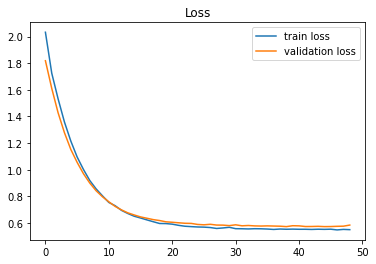

  5%|████▏                                                                              | 1/20 [00:06<02:00,  6.35s/it]

Model: "model_282"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_282 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1463 (Dense)              (None, 32)           2272        input_282[0][0]                  
__________________________________________________________________________________________________
dropout_586 (Dropout)           (None, 32)           0           dense_1463[0][0]                 
__________________________________________________________________________________________________
dense_1464 (Dense)              (None, 32)           1056        dropout_586[0][0]                
__________________________________________________________________________________________

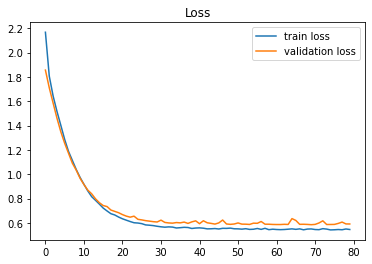

 10%|████████▎                                                                          | 2/20 [00:15<02:11,  7.33s/it]

Model: "model_283"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_283 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1468 (Dense)              (None, 32)           2272        input_283[0][0]                  
__________________________________________________________________________________________________
dropout_588 (Dropout)           (None, 32)           0           dense_1468[0][0]                 
__________________________________________________________________________________________________
dense_1469 (Dense)              (None, 32)           1056        dropout_588[0][0]                
__________________________________________________________________________________________

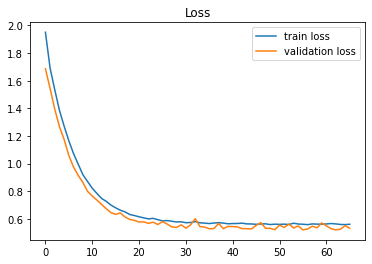

 15%|████████████▍                                                                      | 3/20 [00:23<02:04,  7.34s/it]

Model: "model_284"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_284 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1473 (Dense)              (None, 32)           2272        input_284[0][0]                  
__________________________________________________________________________________________________
dropout_590 (Dropout)           (None, 32)           0           dense_1473[0][0]                 
__________________________________________________________________________________________________
dense_1474 (Dense)              (None, 32)           1056        dropout_590[0][0]                
__________________________________________________________________________________________

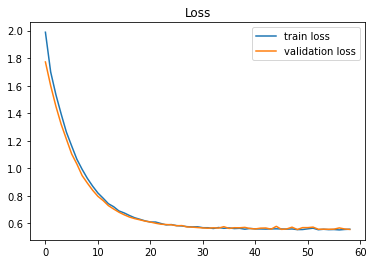

 20%|████████████████▌                                                                  | 4/20 [00:30<01:56,  7.30s/it]

Model: "model_285"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_285 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1478 (Dense)              (None, 32)           2272        input_285[0][0]                  
__________________________________________________________________________________________________
dropout_592 (Dropout)           (None, 32)           0           dense_1478[0][0]                 
__________________________________________________________________________________________________
dense_1479 (Dense)              (None, 32)           1056        dropout_592[0][0]                
__________________________________________________________________________________________

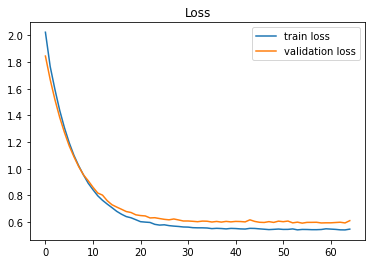

 25%|████████████████████▊                                                              | 5/20 [00:37<01:50,  7.34s/it]

Model: "model_286"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_286 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1483 (Dense)              (None, 32)           2272        input_286[0][0]                  
__________________________________________________________________________________________________
dropout_594 (Dropout)           (None, 32)           0           dense_1483[0][0]                 
__________________________________________________________________________________________________
dense_1484 (Dense)              (None, 32)           1056        dropout_594[0][0]                
__________________________________________________________________________________________

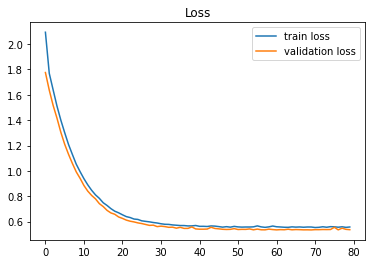

 30%|████████████████████████▉                                                          | 6/20 [00:48<01:54,  8.16s/it]

Model: "model_287"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_287 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1488 (Dense)              (None, 32)           2272        input_287[0][0]                  
__________________________________________________________________________________________________
dropout_596 (Dropout)           (None, 32)           0           dense_1488[0][0]                 
__________________________________________________________________________________________________
dense_1489 (Dense)              (None, 32)           1056        dropout_596[0][0]                
__________________________________________________________________________________________

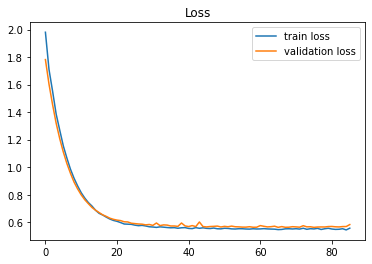

 35%|█████████████████████████████                                                      | 7/20 [00:56<01:48,  8.33s/it]

Model: "model_288"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_288 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1493 (Dense)              (None, 32)           2272        input_288[0][0]                  
__________________________________________________________________________________________________
dropout_598 (Dropout)           (None, 32)           0           dense_1493[0][0]                 
__________________________________________________________________________________________________
dense_1494 (Dense)              (None, 32)           1056        dropout_598[0][0]                
__________________________________________________________________________________________

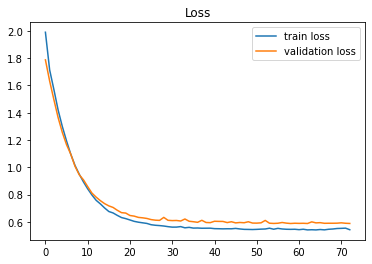

 40%|█████████████████████████████████▏                                                 | 8/20 [01:04<01:39,  8.26s/it]

Model: "model_289"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_289 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1498 (Dense)              (None, 32)           2272        input_289[0][0]                  
__________________________________________________________________________________________________
dropout_600 (Dropout)           (None, 32)           0           dense_1498[0][0]                 
__________________________________________________________________________________________________
dense_1499 (Dense)              (None, 32)           1056        dropout_600[0][0]                
__________________________________________________________________________________________

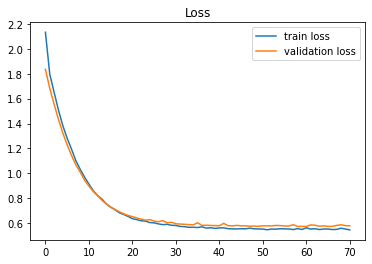

 45%|█████████████████████████████████████▎                                             | 9/20 [01:13<01:31,  8.31s/it]

Model: "model_290"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_290 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1503 (Dense)              (None, 32)           2272        input_290[0][0]                  
__________________________________________________________________________________________________
dropout_602 (Dropout)           (None, 32)           0           dense_1503[0][0]                 
__________________________________________________________________________________________________
dense_1504 (Dense)              (None, 32)           1056        dropout_602[0][0]                
__________________________________________________________________________________________

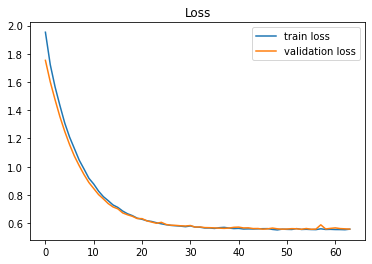

 50%|█████████████████████████████████████████                                         | 10/20 [01:21<01:21,  8.14s/it]

Model: "model_291"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_291 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1508 (Dense)              (None, 32)           2272        input_291[0][0]                  
__________________________________________________________________________________________________
dropout_604 (Dropout)           (None, 32)           0           dense_1508[0][0]                 
__________________________________________________________________________________________________
dense_1509 (Dense)              (None, 32)           1056        dropout_604[0][0]                
__________________________________________________________________________________________

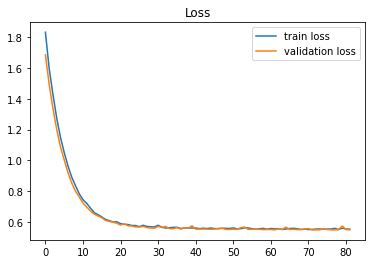

 55%|█████████████████████████████████████████████                                     | 11/20 [01:30<01:16,  8.53s/it]

Model: "model_292"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_292 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1513 (Dense)              (None, 32)           2272        input_292[0][0]                  
__________________________________________________________________________________________________
dropout_606 (Dropout)           (None, 32)           0           dense_1513[0][0]                 
__________________________________________________________________________________________________
dense_1514 (Dense)              (None, 32)           1056        dropout_606[0][0]                
__________________________________________________________________________________________

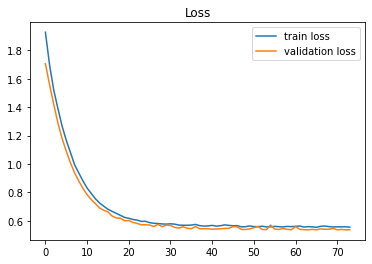

 60%|█████████████████████████████████████████████████▏                                | 12/20 [01:39<01:09,  8.72s/it]

Model: "model_293"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_293 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1518 (Dense)              (None, 32)           2272        input_293[0][0]                  
__________________________________________________________________________________________________
dropout_608 (Dropout)           (None, 32)           0           dense_1518[0][0]                 
__________________________________________________________________________________________________
dense_1519 (Dense)              (None, 32)           1056        dropout_608[0][0]                
__________________________________________________________________________________________

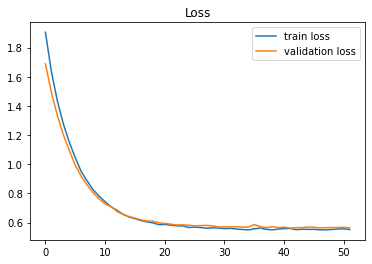

 65%|█████████████████████████████████████████████████████▎                            | 13/20 [01:45<00:55,  7.94s/it]

Model: "model_294"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_294 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1523 (Dense)              (None, 32)           2272        input_294[0][0]                  
__________________________________________________________________________________________________
dropout_610 (Dropout)           (None, 32)           0           dense_1523[0][0]                 
__________________________________________________________________________________________________
dense_1524 (Dense)              (None, 32)           1056        dropout_610[0][0]                
__________________________________________________________________________________________

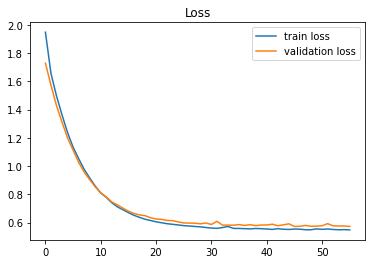

 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [01:52<00:45,  7.59s/it]

Model: "model_295"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_295 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1528 (Dense)              (None, 32)           2272        input_295[0][0]                  
__________________________________________________________________________________________________
dropout_612 (Dropout)           (None, 32)           0           dense_1528[0][0]                 
__________________________________________________________________________________________________
dense_1529 (Dense)              (None, 32)           1056        dropout_612[0][0]                
__________________________________________________________________________________________

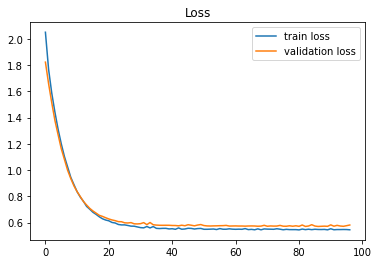

 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [02:02<00:41,  8.27s/it]

Model: "model_296"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_296 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1533 (Dense)              (None, 32)           2272        input_296[0][0]                  
__________________________________________________________________________________________________
dropout_614 (Dropout)           (None, 32)           0           dense_1533[0][0]                 
__________________________________________________________________________________________________
dense_1534 (Dense)              (None, 32)           1056        dropout_614[0][0]                
__________________________________________________________________________________________

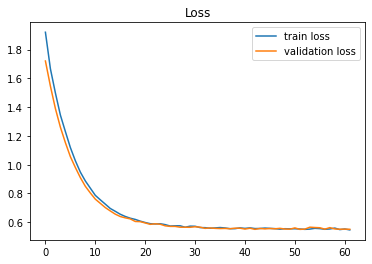

 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [02:09<00:31,  7.84s/it]

Model: "model_297"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_297 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1538 (Dense)              (None, 32)           2272        input_297[0][0]                  
__________________________________________________________________________________________________
dropout_616 (Dropout)           (None, 32)           0           dense_1538[0][0]                 
__________________________________________________________________________________________________
dense_1539 (Dense)              (None, 32)           1056        dropout_616[0][0]                
__________________________________________________________________________________________

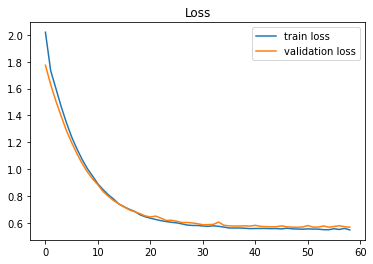

 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [02:16<00:22,  7.58s/it]

Model: "model_298"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_298 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1543 (Dense)              (None, 32)           2272        input_298[0][0]                  
__________________________________________________________________________________________________
dropout_618 (Dropout)           (None, 32)           0           dense_1543[0][0]                 
__________________________________________________________________________________________________
dense_1544 (Dense)              (None, 32)           1056        dropout_618[0][0]                
__________________________________________________________________________________________

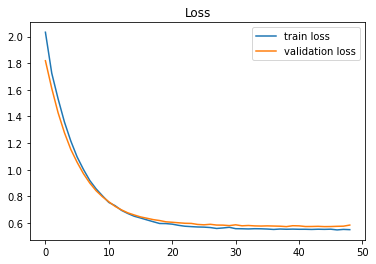

 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [02:22<00:14,  7.13s/it]

Model: "model_299"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_299 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1548 (Dense)              (None, 32)           2272        input_299[0][0]                  
__________________________________________________________________________________________________
dropout_620 (Dropout)           (None, 32)           0           dense_1548[0][0]                 
__________________________________________________________________________________________________
dense_1549 (Dense)              (None, 32)           1056        dropout_620[0][0]                
__________________________________________________________________________________________

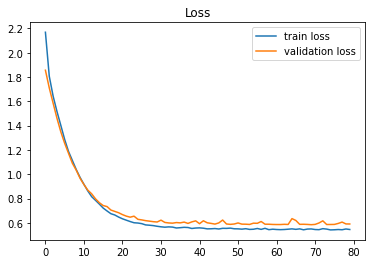

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [02:30<00:07,  7.52s/it]

Model: "model_300"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_300 (InputLayer)          (None, 70)           0                                            
__________________________________________________________________________________________________
dense_1553 (Dense)              (None, 32)           2272        input_300[0][0]                  
__________________________________________________________________________________________________
dropout_622 (Dropout)           (None, 32)           0           dense_1553[0][0]                 
__________________________________________________________________________________________________
dense_1554 (Dense)              (None, 32)           1056        dropout_622[0][0]                
__________________________________________________________________________________________

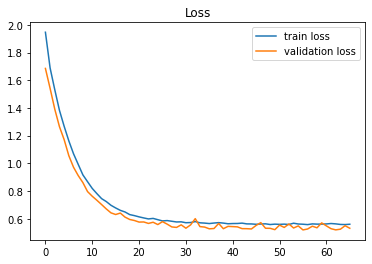

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:37<00:00,  7.89s/it]


In [70]:
# Define the number of features
max_features = X_train.shape[1]
# Define the Model architecture
N = 20
p = 3.5
preds = []
aucs = []

for i in tqdm(range(N)):    
    SEED = np.random.randint(1, 10000)              
    random.seed(SEED)       
    np.random.seed(SEED)     
    if tf.__version__[0] < '2':  
        tf.set_random_seed(SEED)
    else:
        tf.random.set_seed(SEED)
        
    # Define the Model architecture

    in_dnn = Input(shape=(X_train.shape[1],)) 
    x = Dense(32, activation='elu', input_shape=(max_features,), kernel_regularizer=l2(0.01), kernel_initializer='he_normal')(in_dnn) 
    x = Dropout(0.15)(x)
    x1 = Dense(32, kernel_regularizer=l2(0.01), kernel_initializer='he_normal')(x)
    x = Add()([x1, x])
    x = Dense(16, activation='elu', kernel_initializer='he_normal')(x)
    x = Dropout(0.1)(x)
    x1 = Dense(16, kernel_initializer='he_normal')(x)
    x = Add()([x1, x])
    #x = PReLU()(x)
    #x = BatchNormalization()(x)
    #x = Dropout(0.1)(x)
    #x = Dense(4, activation='relu', kernel_initializer='he_normal')(x)
    out_dnn = Dense(1, activation='sigmoid')(x)

    model = Model(in_dnn, out_dnn)
    model.summary()

    # Train the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',tf.keras.metrics.AUC()])

    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=10),
                 keras.callbacks.ModelCheckpoint(filepath='best_model2.h5',
                                                 monitor='val_loss',
                                                 save_best_only=True)]

    history = model.fit(train_x, train_y, epochs=100, batch_size=64, 
                        validation_data=(valid_x,valid_y), callbacks=callbacks, verbose=0)
    
    auc = roc_auc_score(valid_y, model.predict(valid_x).flatten())
    aucs.append(auc)
    print('AUC', auc)
    preds.append(model.predict(X_test).flatten())  
    
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

In [71]:
print('\nValidation Summary:')
aucs = pd.Series(aucs)
print(aucs.sort_values(ascending=False))
print('mean={:.5f}, std={:.3f}'.format(aucs.mean(), aucs.std()))


Validation Summary:
19    0.791697
2     0.791670
5     0.790072
11    0.786528
15    0.781984
3     0.777516
9     0.776933
10    0.772387
12    0.769508
8     0.764643
13    0.763599
14    0.762249
6     0.762142
16    0.753458
18    0.749375
1     0.749357
7     0.748180
17    0.747158
0     0.747158
4     0.725874
dtype: float64
mean=0.76557, std=0.018


In [11]:
cd C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Submission

C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Submission


In [25]:
from scipy.stats.mstats import gmean
# Power mean ensemble
THRESHOLD = 0.786  # Use only models whose AUC exceeds this value

target_pred = []
n = 0
for i in range(N):
    if aucs.iloc[i] > THRESHOLD:
        target_pred.append(preds[i])
        n += 1
pred = gmean(target_pred)

# Make a submission file
t = pd.Timestamp.now()
fname = f"DNN_F1_En{n}_submit_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'DNN_F2_p3.5n5_submit_06132253.csv' is ready to submit.


In [13]:
# pred = model.predict(X_test)[:,0]
# t = pd.Timestamp.now()
# fname = f"NN_submission_F2_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
# submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
# submissions.to_csv(fname, index=False)
# print(f"'{fname}' is ready to submit.")

'NN_submission_F2_06102158.csv' is ready to submit.
